# Notebook for testing showCamera.
Initially written 09 Mar 2020 by Craig Lage.\
Testing w_2020_13 code.

In [9]:
! eups list -s | grep lsst_distrib
! eups list -s | grep obs_lsst

lsst_distrib          19.0.0-1-gc154f85+28 	current w_2020_16 setup
obs_lsst              19.0.0-46-g28590c9 	current w_2020_16 setup
obs_lsstSim           19.0.0-2-g6d6cf70+6 	current w_2020_16 setup
obs_lsst_data         19.0.0-3-g62ccb58 	current w_2020_16 setup


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lsst.daf.persistence import Butler
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.display as afwDisplay

In [11]:
def myCallback(im, ccd, imageSource):
    """Assemble the CCD image.  Just bias subtraction and gain correction"""
    oim = camGeomUtils.rawCallback(im, ccd, imageSource,
                                       subtractBias=True, correctGain=True)
    return oim

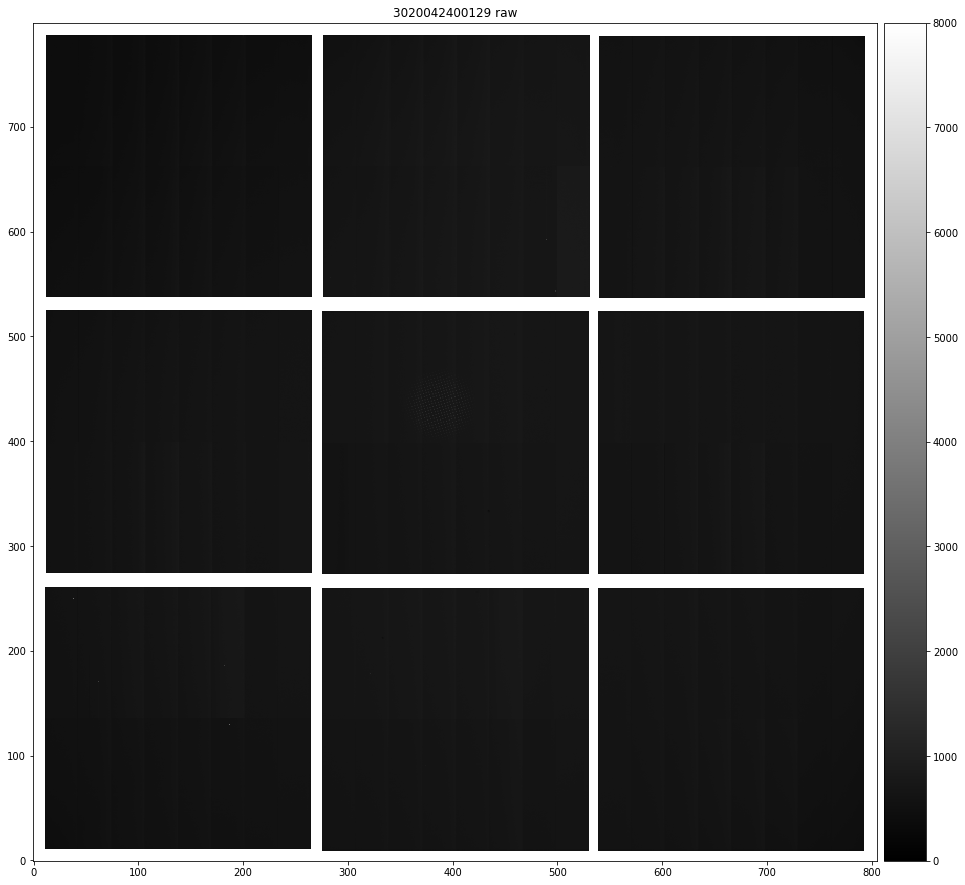

In [20]:
REPO_DIR = '/lsstdata/offline/teststand/comcam/CCS/gen2repo'
butler = Butler(REPO_DIR)
#visit = 3020030300064
#visit = 3020030300034
#visit = 3020042200012
visit = 3020042400129
dataId = dict(visit=visit, detector=94)
camera = butler.get('camera')

fig = plt.figure(figsize=(16,16))
disp = afwDisplay.Display(1, "matplotlib")
disp.scale('linear', 0, max=8000)

dataType='raw'
mos = camGeomUtils.showCamera(camera, \
                              camGeomUtils.ButlerImage(butler, dataType, visit=dataId["visit"], \
                                                        verbose=False, callback = myCallback,\
#                                                        verbose=False, callback = camGeomUtils.rawCallback,\
                                                      background = np.nan),\
#                              binSize=16, detectorNameList=[90,91,92,93,94,95,96,97,98], display=disp, overlay=False, \
                              binSize=16, display=disp, overlay=False, \
                              title="%d %s" % (visit, dataType))
#fig.savefig(REPO_DIR+'plots/Pinhole_w_2020_13_04Apr20.png')